In [45]:
import pandas as pd

data = pd.read_csv("/content/MSFT.csv")

In [46]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400


In [47]:
data.shape

(9373, 7)

In [48]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9.373000e+03
mean,48.187510,48.708432,47.657192,48.202110,42.795510,5.784494e+07
std,70.321724,71.052606,69.559191,70.348664,70.344745,3.823132e+07
min,0.088542,0.092014,0.088542,0.090278,0.056201,2.304000e+06
25%,5.343750,5.429688,5.250000,5.367188,3.341276,3.356960e+07
50%,27.049999,27.350000,26.830000,27.090000,19.038940,5.105760e+07
75%,43.468750,44.031250,43.000000,43.500000,32.936100,7.163840e+07
max,344.619995,349.670013,342.200012,343.109985,338.335938,1.031789e+09


In [49]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [50]:
data['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9368    2023-05-15
9369    2023-05-16
9370    2023-05-17
9371    2023-05-18
9372    2023-05-19
Name: Date, Length: 9373, dtype: object

**We will convert the Datatype of Date from Object to datetime**

In [51]:
data['Date'] = pd.to_datetime(data['Date'])

In [52]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

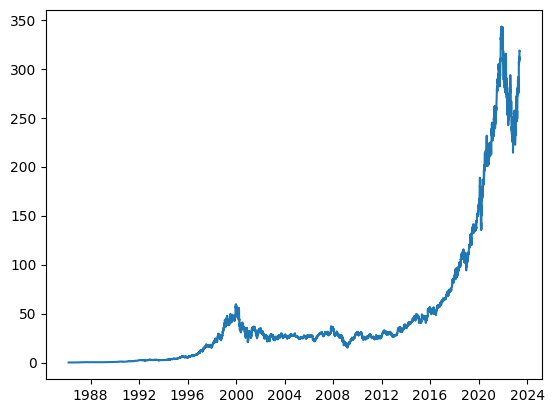

In [53]:
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Close'])

In [60]:
data1 = data['Close']
data1

0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
9368    309.459991
9369    311.739990
9370    314.000000
9371    318.519989
9372    318.339996
Name: Close, Length: 9373, dtype: float64

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [62]:
data1

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       ...,
       [9.15136115e-01],
       [9.28313168e-01],
       [9.27788438e-01]])

In [63]:
training_size = int(len(data1)*0.65)
test_size = len(data1)-training_size
train_data, test_data = data1[0:training_size,:],data1[training_size:len(data1),:1]

In [64]:
training_size, test_size

(6092, 3281)

**As it is a time series data so the output must know the sequence of previous inputs for this we make will make function**

In [65]:
import numpy

def create_dataset(dataset, timestep=1):
  X,y = [],[]
  for i in range (len(dataset)-timestep-1):
    a = dataset[i:(i+timestep),0]
    X.append(a)
    y.append(dataset[i+timestep,0])
  return numpy.array(X), numpy.array(y)

In [66]:
timestep=100
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

In [67]:
X_train, y_train

(array([[2.02437349e-05, 3.03656023e-05, 3.54294513e-05, ...,
         2.53046686e-05, 2.27742017e-05, 2.27742017e-05],
        [3.03656023e-05, 3.54294513e-05, 2.78351354e-05, ...,
         2.27742017e-05, 2.27742017e-05, 2.02437349e-05],
        [3.54294513e-05, 2.78351354e-05, 2.27742017e-05, ...,
         2.27742017e-05, 2.02437349e-05, 1.77132680e-05],
        ...,
        [8.59417736e-02, 8.63499105e-02, 8.68163618e-02, ...,
         9.01106303e-02, 8.87696024e-02, 8.97024934e-02],
        [8.63499105e-02, 8.68163618e-02, 8.67580532e-02, ...,
         8.87696024e-02, 8.97024934e-02, 8.75743299e-02],
        [8.68163618e-02, 8.67580532e-02, 8.75160301e-02, ...,
         8.97024934e-02, 8.75743299e-02, 8.67580532e-02]]),
 array([2.02437349e-05, 1.77132680e-05, 1.51828011e-05, ...,
        8.75743299e-02, 8.67580532e-02, 8.42217558e-02]))

In [68]:
X_train.shape

(5991, 100)

In [70]:
y_train.shape

(5991,)

In [71]:
X_test.shape

(3180, 100)

In [72]:
y_test.shape

(3180,)

In [73]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [74]:
X_train.shape

(5991, 100, 1)

In [87]:
threshold = round(0.9 + X_train.shape[0])
threshold

5992

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [93]:
model = keras.Sequential()
model.add(layers.GRU(15,
                     activation = 'tanh',
                     recurrent_activation = 'sigmoid',
                     input_shape = (X_train.shape[1],X_train.shape[2]
                     )))

model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 15)                810       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(
    X_train[:threshold],
    y_train[:threshold],
    shuffle = False,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 1 
)

Epoch 1/100
150/150 [==============================] - 6s 27ms/step - loss: 1.6714e-04 - val_loss: 1.2601e-04
Epoch 2/100
150/150 [==============================] - 4s 29ms/step - loss: 4.2130e-04 - val_loss: 9.1816e-05
Epoch 3/100
150/150 [==============================] - 4s 27ms/step - loss: 4.2571e-04 - val_loss: 9.4669e-05
Epoch 4/100
150/150 [==============================] - 4s 26ms/step - loss: 4.4047e-04 - val_loss: 7.7106e-05
Epoch 5/100
150/150 [==============================] - 4s 29ms/step - loss: 4.3415e-04 - val_loss: 7.2227e-05
Epoch 6/100
150/150 [==============================] - 4s 25ms/step - loss: 4.0072e-04 - val_loss: 8.2180e-05
Epoch 7/100
150/150 [==============================] - 4s 26ms/step - loss: 3.7347e-04 - val_loss: 8.1184e-05
Epoch 8/100
150/150 [==============================] - 4s 30ms/step - loss: 3.6503e-04 - val_loss: 9.0155e-05
Epoch 9/100
150/150 [==============================] - 4s 26ms/step - loss: 3.5125e-04 - val_loss: 9.1514e-05
Epoch 10/1

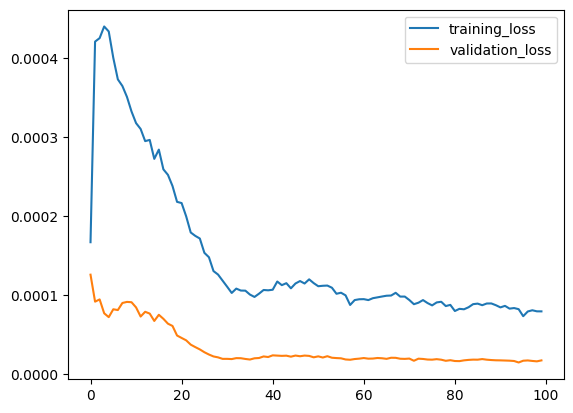

In [95]:
plt.plot(history.history['loss'],label = 'training_loss')
plt.plot(history.history['val_loss'],label = 'validation_loss')
plt.legend()

In [96]:
test_data_prediction = model.predict(X_test)

100/100 [==============================] - 1s 4ms/step


In [97]:
print(test_data_prediction)

[[0.07468111]
 [0.07466892]
 [0.07444057]
 ...
 [0.7403871 ]
 [0.74766   ]
 [0.75667185]]


In [98]:
from sklearn import metrics 
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [99]:
print("Mean Absoulte Error of our Model is: ", mae)


Mean Absoulte Error of our Model is:  0.056441542712901506
